In [21]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score,accuracy_score

%matplotlib inline

In [22]:
# load in the files
file = Path("../resources/merged_covid.csv")
file1= Path("../resources/government_regulation.csv")
file2= Path("../resources/covid_stats.csv")
file3= Path("../resources/merged_covid_stats_population.csv")

# read the files
df= pd.read_csv(file)
df_gov=pd.read_csv(file1)
df_st=pd.read_csv(file2)
df_pop=pd.read_csv(file3)


In [23]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object
(48591, 15)


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [24]:
# Check df_gov
print(df_gov.shape)
print(df_gov.dtypes)

# Display df
df_gov.head()



(57340, 8)
Date_updated                        object
CountryName                         object
CountryCode                         object
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,Date_updated,CountryName,CountryCode,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0


In [25]:
# Check df_gov
print(df_st.shape)
print(df_st.dtypes)

# Display df
df_st.head()

(34927, 10)
date_updated             object
iso_code                 object
continent                object
location                 object
new_cases               float64
new_deaths              float64
new_tests               float64
total_cases_updated     float64
total_deaths_updated    float64
total_tests_updated     float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0


In [26]:
# check merged df for null values.
df.describe()

,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
count,48591.000000,48591.000000,4.859100e+04,4.840100e+04,48401.000000,4.859100e+04,47852.000000,47852.000000,47731.000000,47852.000000,46911.000000
mean,6963.026137,216.707436,9.649910e+04,4.669529e+05,19638.592694,5.972463e+06,54.998629,61.056228,53.631534,55.611587,43.229200
std,15758.304949,520.361894,2.307435e+05,1.199741e+06,44926.853340,1.649185e+07,28.711626,29.466818,25.338390,26.103126,34.062708
min,-2461.000000,-1918.000000,-3.743000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,5.300000e+01,0.000000,0.000000e+00,36.110000,45.240000,41.670000,41.670000,0.000000
50%,34.000000,0.000000,0.000000e+00,1.965000e+03,45.000000,1.224000e+03,62.040000,70.240000,62.180000,63.260000,50.000000
75%,1075.000000,30.000000,1.346800e+04,7.240000e+04,2267.000000,8.247120e+05,77.780000,83.330000,72.120000,75.000000,75.000000
max,78761.000000,4928.000000,1.194086e+06,5.997163e+06,183069.000000,8.389842e+07,100.000000,100.000000,96.150000,100.000000,100.000000


In [27]:
# Check merged df with pop df.
print(df_pop.shape)
print(df_pop.dtypes)
df_pop.head()

(48591, 18)
date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
population                         float64
population_density                 float64
median_age                         float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,population,population_density,median_age,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [28]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df_pop[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766.0,584.800,41.2,2.0,0.00,0.0
1,106766.0,584.800,41.2,2.0,33.33,0.0
2,106766.0,584.800,41.2,4.0,33.33,0.0
3,106766.0,584.800,41.2,4.0,44.44,0.0
4,106766.0,584.800,41.2,4.0,44.44,0.0
...,...,...,...,...,...,...
48586,14862927.0,42.729,19.6,6251.0,80.56,179.0
48587,14862927.0,42.729,19.6,6292.0,80.56,189.0
48588,14862927.0,42.729,19.6,6388.0,80.56,195.0
48589,14862927.0,42.729,19.6,6406.0,80.56,196.0


In [29]:
df_death_ml.dtypes

population                 float64
population_density         float64
median_age                 float64
total_cases_updated        float64
StringencyIndex_updated    float64
total_deaths_updated       float64
dtype: object

In [30]:
df_death_ml.shape

(48591, 6)

In [31]:
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(45075, 6)

In [32]:
# Create a df to test impact of some features on 'total cases'
df_cases_ml=df_pop[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','total_cases_updated']]
df_cases_ml

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766.0,584.800,41.2,3.03,0.00,2.0
1,106766.0,584.800,41.2,34.85,33.33,2.0
2,106766.0,584.800,41.2,34.85,33.33,4.0
3,106766.0,584.800,41.2,43.94,44.44,4.0
4,106766.0,584.800,41.2,43.94,44.44,4.0
...,...,...,...,...,...,...
48586,14862927.0,42.729,19.6,73.48,80.56,6251.0
48587,14862927.0,42.729,19.6,73.48,80.56,6292.0
48588,14862927.0,42.729,19.6,73.48,80.56,6388.0
48589,14862927.0,42.729,19.6,73.48,80.56,6406.0


In [33]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [34]:
X.shape

(45075, 5)

In [35]:
# create training and testing datasets
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 2593154048.0000 - mse: 2593154048.0000
Epoch 2/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 2586785792.0000 - mse: 2586785792.0000
Epoch 3/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 2574225152.0000 - mse: 2574225152.0000
Epoch 4/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 2557842432.0000 - mse: 2557842432.0000
Epoch 5/1000
1339/1339 [============================

1339/1339 [==============================] - 3s 2ms/step - loss: 167136208.0000 - mse: 167136208.0000
Epoch 66/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 157079552.0000 - mse: 157079552.0000
Epoch 67/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 147873760.0000 - mse: 147873760.0000
Epoch 68/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 139485200.0000 - mse: 139485200.0000
Epoch 69/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 131945592.0000 - mse: 131945592.0000
Epoch 70/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 125180752.0000 - mse: 125180752.0000
Epoch 71/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 119040288.0000 - mse: 119040288.0000
Epoch 72/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 113512752.0000 - mse: 113512752.0000
Epoch 73/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 1085268

1339/1339 [==============================] - 2s 2ms/step - loss: 37805964.0000 - mse: 37805964.0000
Epoch 137/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 37513524.0000 - mse: 37513524.0000
Epoch 138/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 37228524.0000 - mse: 37228524.0000
Epoch 139/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 36949884.0000 - mse: 36949884.0000
Epoch 140/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 36681848.0000 - mse: 36681848.0000
Epoch 141/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 36424672.0000 - mse: 36424672.0000
Epoch 142/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 36172868.0000 - mse: 36172868.0000
Epoch 143/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 35925476.0000 - mse: 35925476.0000
Epoch 144/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 35683572.0000 -

1339/1339 [==============================] - 2s 1ms/step - loss: 27561322.0000 - mse: 27561322.0000
Epoch 208/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27497462.0000 - mse: 27497462.0000
Epoch 209/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27434100.0000 - mse: 27434100.0000
Epoch 210/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 27372312.0000 - mse: 27372312.0000
Epoch 211/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27308850.0000 - mse: 27308850.0000
Epoch 212/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27247028.0000 - mse: 27247028.0000
Epoch 213/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27187398.0000 - mse: 27187398.0000
Epoch 214/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27129580.0000 - mse: 27129580.0000
Epoch 215/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 27071528.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 24805952.0000 - mse: 24805952.0000
Epoch 279/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24784396.0000 - mse: 24784396.0000
Epoch 280/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24763092.0000 - mse: 24763092.0000
Epoch 281/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24742846.0000 - mse: 24742846.0000
Epoch 282/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24722748.0000 - mse: 24722748.0000
Epoch 283/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 24701670.0000 - mse: 24701670.0000
Epoch 284/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24681834.0000 - mse: 24681834.0000
Epoch 285/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24663118.0000 - mse: 24663118.0000
Epoch 286/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 24640164.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 23671862.0000 - mse: 23671862.0000
Epoch 349/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 23657576.0000 - mse: 23657576.0000
Epoch 350/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 23642854.0000 - mse: 23642854.0000
Epoch 351/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 23628544.0000 - mse: 23628544.0000
Epoch 352/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 23613038.0000 - mse: 23613038.0000
Epoch 353/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 23598148.0000 - mse: 23598148.0000
Epoch 354/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 23582658.0000 - mse: 23582658.0000
Epoch 355/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 23568048.0000 - mse: 23568048.0000
Epoch 356/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 23552494.0000 -

1339/1339 [==============================] - 2s 1ms/step - loss: 22300400.0000 - mse: 22300400.0000
Epoch 420/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22272412.0000 - mse: 22272412.0000
Epoch 421/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22245598.0000 - mse: 22245598.0000
Epoch 422/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 22216624.0000 - mse: 22216624.0000
Epoch 423/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22189290.0000 - mse: 22189290.0000
Epoch 424/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22163176.0000 - mse: 22163176.0000
Epoch 425/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22133240.0000 - mse: 22133240.0000
Epoch 426/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22104642.0000 - mse: 22104642.0000
Epoch 427/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 22076370.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 19702072.0000 - mse: 19702072.0000
Epoch 491/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19660712.0000 - mse: 19660712.0000
Epoch 492/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19616962.0000 - mse: 19616962.0000
Epoch 493/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19574706.0000 - mse: 19574706.0000
Epoch 494/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19533186.0000 - mse: 19533186.0000
Epoch 495/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19491092.0000 - mse: 19491092.0000
Epoch 496/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19450398.0000 - mse: 19450398.0000
Epoch 497/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 19410164.0000 - mse: 19410164.0000
Epoch 498/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 19368548.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 18439202.0000 - mse: 18439202.0000
Epoch 562/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18432426.0000 - mse: 18432426.0000
Epoch 563/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18426776.0000 - mse: 18426776.0000
Epoch 564/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18420600.0000 - mse: 18420600.0000
Epoch 565/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18414034.0000 - mse: 18414034.0000
Epoch 566/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18408524.0000 - mse: 18408524.0000
Epoch 567/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18402560.0000 - mse: 18402560.0000
Epoch 568/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18396674.0000 - mse: 18396674.0000
Epoch 569/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18391146.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 18090048.0000 - mse: 18090048.0000
Epoch 633/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18086426.0000 - mse: 18086426.0000
Epoch 634/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18081842.0000 - mse: 18081842.0000
Epoch 635/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18077242.0000 - mse: 18077242.0000
Epoch 636/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18073488.0000 - mse: 18073488.0000
Epoch 637/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 18068866.0000 - mse: 18068866.0000
Epoch 638/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18065970.0000 - mse: 18065970.0000
Epoch 639/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18061688.0000 - mse: 18061688.0000
Epoch 640/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 18057534.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 17836210.0000 - mse: 17836210.0000
Epoch 704/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 17832806.0000 - mse: 17832806.0000
Epoch 705/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17829556.0000 - mse: 17829556.0000
Epoch 706/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17825584.0000 - mse: 17825584.0000
Epoch 707/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17823478.0000 - mse: 17823478.0000
Epoch 708/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 17819482.0000 - mse: 17819482.0000
Epoch 709/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17816716.0000 - mse: 17816716.0000
Epoch 710/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17814100.0000 - mse: 17814100.0000
Epoch 711/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17810222.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 17603842.0000 - mse: 17603842.0000
Epoch 775/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17600066.0000 - mse: 17600066.0000
Epoch 776/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17596080.0000 - mse: 17596080.0000
Epoch 777/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17594044.0000 - mse: 17594044.0000
Epoch 778/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17589844.0000 - mse: 17589844.0000
Epoch 779/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17586496.0000 - mse: 17586496.0000
Epoch 780/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17583686.0000 - mse: 17583686.0000
Epoch 781/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17580856.0000 - mse: 17580856.0000
Epoch 782/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17576252.0000 -

1339/1339 [==============================] - 2s 2ms/step - loss: 17384258.0000 - mse: 17384258.0000
Epoch 845/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17381488.0000 - mse: 17381488.0000
Epoch 846/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17379450.0000 - mse: 17379450.0000
Epoch 847/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17376270.0000 - mse: 17376270.0000
Epoch 848/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17373402.0000 - mse: 17373402.0000
Epoch 849/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17370558.0000 - mse: 17370558.0000
Epoch 850/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17367790.0000 - mse: 17367790.0000
Epoch 851/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17364694.0000 - mse: 17364694.0000
Epoch 852/1000
1339/1339 [==============================] - 2s 1ms/step - loss: 17362480.0000 -

Epoch 915/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17195730.0000 - mse: 17195730.0000
Epoch 916/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17193448.0000 - mse: 17193448.0000
Epoch 917/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17188446.0000 - mse: 17188446.0000
Epoch 918/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17187698.0000 - mse: 17187698.0000
Epoch 919/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17184314.0000 - mse: 17184314.0000
Epoch 920/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17177146.0000 - mse: 17177146.0000
Epoch 921/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17178926.0000 - mse: 17178926.0000
Epoch 922/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 17175112.0000 - mse: 17175112.0000
Epoch 923/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 

1339/1339 [==============================] - 2s 1ms/step - loss: 16922242.0000 - mse: 16922242.0000
Epoch 987/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 16918096.0000 - mse: 16918096.0000
Epoch 988/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 16913650.0000 - mse: 16913650.0000
Epoch 989/1000
1339/1339 [==============================] - ETA: 0s - loss: 16851676.0000 - mse: 16851676.000 - 2s 2ms/step - loss: 16909632.0000 - mse: 16909632.0000
Epoch 990/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 16904426.0000 - mse: 16904426.0000
Epoch 991/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 16901826.0000 - mse: 16901826.0000
Epoch 992/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 16897052.0000 - mse: 16897052.0000
Epoch 993/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 16893214.0000 - mse: 16893214.0000
Epoch 994/1000
1339/1339 [=================

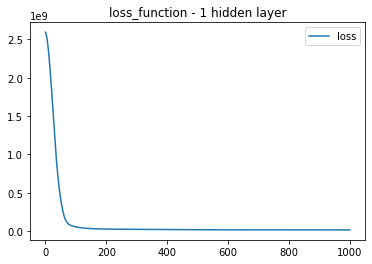

0.9921448618321096
0.9911214442404243


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [36]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=1000)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1339/1339 [==============================] - 4s 3ms/step - loss: 2587150080.0000 - mse: 2587150080.0000
Epoch 2/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 2496034048.0000 - mse: 2496034048.0000
Epoch 3/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 2241252352.0000 - mse: 2241252352.0000
Epoch 4/1000
1339/1339 [===========

1339/1339 [==============================] - 2s 2ms/step - loss: 14786070.0000 - mse: 14786070.0000
Epoch 67/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 14691656.0000 - mse: 14691656.0000
Epoch 68/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14607081.0000 - mse: 14607081.0000
Epoch 69/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14481662.0000 - mse: 14481662.0000
Epoch 70/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14406911.0000 - mse: 14406911.0000
Epoch 71/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14353048.0000 - mse: 14353048.0000
Epoch 72/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14302081.0000 - mse: 14302081.0000
Epoch 73/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14256207.0000 - mse: 14256207.0000
Epoch 74/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 14219893.0000 - mse: 14

1339/1339 [==============================] - 2s 2ms/step - loss: 12978041.0000 - mse: 12978041.0000
Epoch 138/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 12957476.0000 - mse: 12957476.0000
Epoch 139/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 12931917.0000 - mse: 12931917.0000
Epoch 140/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 12914360.0000 - mse: 12914360.0000
Epoch 141/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 12893651.0000 - mse: 12893651.0000
Epoch 142/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 12873474.0000 - mse: 12873474.0000
Epoch 143/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 12857514.0000 - mse: 12857514.0000
Epoch 144/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 12835694.0000 - mse: 12835694.0000
Epoch 145/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 12812709.0000 -

1339/1339 [==============================] - 3s 2ms/step - loss: 10977096.0000 - mse: 10977096.0000
Epoch 209/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 10961417.0000 - mse: 10961417.0000
Epoch 210/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 10944598.0000 - mse: 10944598.0000
Epoch 211/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 10923455.0000 - mse: 10923455.0000
Epoch 212/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 10904201.0000 - mse: 10904201.0000
Epoch 213/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 10887016.0000 - mse: 10887016.0000A: 0s - loss: 10902086.0000 - mse:
Epoch 214/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 10870513.0000 - mse: 10870513.0000
Epoch 215/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 10849983.0000 - mse: 10849983.0000
Epoch 216/1000
1339/1339 [==============================] - 2

1339/1339 [==============================] - 3s 2ms/step - loss: 9895771.0000 - mse: 9895771.0000
Epoch 280/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9880377.0000 - mse: 9880377.0000
Epoch 281/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 9870372.0000 - mse: 9870372.0000
Epoch 282/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 9850275.0000 - mse: 9850275.0000
Epoch 283/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 9847664.0000 - mse: 9847664.0000
Epoch 284/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9830825.0000 - mse: 9830825.0000
Epoch 285/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9823278.0000 - mse: 9823278.0000
Epoch 286/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9815933.0000 - mse: 9815933.0000
Epoch 287/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9802085.0000 - mse: 9802085.000

1339/1339 [==============================] - 2s 2ms/step - loss: 9286013.0000 - mse: 9286013.0000
Epoch 352/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 9279789.0000 - mse: 9279789.0000
Epoch 353/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9272953.0000 - mse: 9272953.0000
Epoch 354/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9263015.0000 - mse: 9263015.0000
Epoch 355/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 9253758.0000 - mse: 9253758.0000
Epoch 356/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9246574.0000 - mse: 9246574.0000
Epoch 357/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9237435.0000 - mse: 9237435.0000
Epoch 358/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9224000.0000 - mse: 9224000.0000
Epoch 359/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 9212585.0000 - mse: 9212585.000

1339/1339 [==============================] - 3s 2ms/step - loss: 8578086.0000 - mse: 8578086.0000
Epoch 424/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 8568517.0000 - mse: 8568517.0000
Epoch 425/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8565830.0000 - mse: 8565830.0000
Epoch 426/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8558791.0000 - mse: 8558791.0000
Epoch 427/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8550238.0000 - mse: 8550238.0000
Epoch 428/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8545706.0000 - mse: 8545706.0000
Epoch 429/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8533686.0000 - mse: 8533686.0000
Epoch 430/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 8531473.0000 - mse: 8531473.0000
Epoch 431/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8525038.0000 - mse: 8525038.000

1339/1339 [==============================] - 3s 2ms/step - loss: 8067474.0000 - mse: 8067474.0000
Epoch 496/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 8052825.0000 - mse: 8052825.0000
Epoch 497/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8059696.0000 - mse: 8059696.0000
Epoch 498/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8052047.5000 - mse: 8052047.5000
Epoch 499/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8046941.0000 - mse: 8046941.0000
Epoch 500/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 8045008.0000 - mse: 8045008.0000
Epoch 501/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 8043298.0000 - mse: 8043298.0000
Epoch 502/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8037111.0000 - mse: 8037111.0000
Epoch 503/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 8032714.5000 - mse: 8032714.500

1339/1339 [==============================] - 3s 2ms/step - loss: 7831161.0000 - mse: 7831161.0000
Epoch 568/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7832667.0000 - mse: 7832667.0000
Epoch 569/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7823746.0000 - mse: 7823746.0000
Epoch 570/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7819685.0000 - mse: 7819685.0000
Epoch 571/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7817035.0000 - mse: 7817035.0000
Epoch 572/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7812324.0000 - mse: 7812324.0000
Epoch 573/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7810288.5000 - mse: 7810288.5000
Epoch 574/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7808903.5000 - mse: 7808903.5000
Epoch 575/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 7800500.5000 - mse: 7800500.500

1339/1339 [==============================] - 2s 2ms/step - loss: 7360348.0000 - mse: 7360348.0000
Epoch 640/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7348914.0000 - mse: 7348914.0000
Epoch 641/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7347225.0000 - mse: 7347225.0000
Epoch 642/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7338194.5000 - mse: 7338194.5000
Epoch 643/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7337683.5000 - mse: 7337683.5000
Epoch 644/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7328582.0000 - mse: 7328582.0000
Epoch 645/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7323416.0000 - mse: 7323416.0000
Epoch 646/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7321921.5000 - mse: 7321921.5000
Epoch 647/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7313842.0000 - mse: 7313842.000

1339/1339 [==============================] - 3s 2ms/step - loss: 7043454.0000 - mse: 7043454.0000
Epoch 712/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7031160.5000 - mse: 7031160.5000
Epoch 713/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 7038018.0000 - mse: 7038018.0000
Epoch 714/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7026375.5000 - mse: 7026375.5000
Epoch 715/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7027476.0000 - mse: 7027476.0000
Epoch 716/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7027004.5000 - mse: 7027004.5000
Epoch 717/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7029026.5000 - mse: 7029026.5000
Epoch 718/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 7025474.0000 - mse: 7025474.0000
Epoch 719/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 7019859.5000 - mse: 7019859.500

1339/1339 [==============================] - 2s 2ms/step - loss: 5877441.5000 - mse: 5877441.5000
Epoch 784/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5865314.5000 - mse: 5865314.5000
Epoch 785/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5856861.0000 - mse: 5856861.0000
Epoch 786/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5847571.5000 - mse: 5847571.5000
Epoch 787/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5831653.0000 - mse: 5831653.0000
Epoch 788/1000
1339/1339 [==============================] - 2s 2ms/step - loss: 5822173.5000 - mse: 5822173.5000
Epoch 789/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5804074.5000 - mse: 5804074.5000
Epoch 790/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5787179.0000 - mse: 5787179.0000
Epoch 791/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 5771694.0000 - mse: 5771694.000

1339/1339 [==============================] - 3s 2ms/step - loss: 4347472.5000 - mse: 4347472.5000
Epoch 856/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4334400.0000 - mse: 4334400.0000
Epoch 857/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4322911.0000 - mse: 4322911.0000
Epoch 858/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4308790.0000 - mse: 4308790.0000
Epoch 859/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4295379.5000 - mse: 4295379.5000
Epoch 860/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4284319.0000 - mse: 4284319.0000
Epoch 861/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4274571.0000 - mse: 4274571.0000
Epoch 862/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4260618.5000 - mse: 4260618.5000
Epoch 863/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 4251874.5000 - mse: 4251874.500

1339/1339 [==============================] - 2s 2ms/step - loss: 3625323.7500 - mse: 3625323.7500
Epoch 928/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3621539.7500 - mse: 3621539.7500
Epoch 929/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3612446.7500 - mse: 3612446.7500
Epoch 930/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3606442.0000 - mse: 3606442.0000
Epoch 931/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3596617.5000 - mse: 3596617.5000
Epoch 932/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3588924.7500 - mse: 3588924.7500
Epoch 933/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3583326.2500 - mse: 3583326.2500
Epoch 934/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3574214.7500 - mse: 3574214.7500
Epoch 935/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3571593.5000 - mse: 3571593.500

1339/1339 [==============================] - 3s 2ms/step - loss: 3251141.5000 - mse: 3251141.5000
Epoch 1000/1000
1339/1339 [==============================] - 3s 2ms/step - loss: 3245471.0000 - mse: 3245471.0000


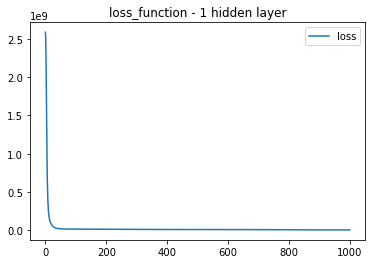

0.9984879448856915
0.9984305018028273


In [37]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 15 # 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# train model
model_1 = nn.fit(X_train_scaled, y_train, epochs=1000)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))